#<a name='4'></a>
<div dir='rtl'>
<h1>4. مدل بیز ساده‌لوح (Naive Bayesian Models)</h1>
</div>

<div dir='rtl'>
در بخش دوم با مدل‌های بیزی آشنا شدید. در پایان آن بخش گفته شد که تعداد متغیر‌های پیشگو می‌تواند بیشتر از یکی باشد. در این بخش قصد بررسی این حالت از مسائل را داریم. مسئله‌ای را مطرح می‌کنیم ک دارای دو متغیر پیشگو باشد.
</div>

<div dir='rtl'>
مثال) شرایط سوال بخش دوم را درنظر بگیرید. قصد داریم با اضافه کردن معیاری جدید مبنی بر تعداد دفعات مشارکت دانشجو در امر تقلب، سعی کنیم مدل بیز قوی‌تری بسازیم. برای ساده سازی، مرز یافته شده در بخش قبل برای میزان مشارکت (0.56) را در این بخش درنظر گرفته و آن را تغییر نخواهیم داد. در ادامه به یافتن بهترین مرز تعداد تقلب‌ها خواهیم پرداخت به نحوی که با اعمال این مرز برای تبدیل اطلاعات به شکل باینری، به بهترین بازدهی برسیم. 
</div>

In [1]:
follow_rate = c(
  0.259, 0.944, 0.676, 0.148, 0.546, 0.556, 0.833, 0.87 , 0.713, 0.704, 0.019,
  0.833, 0.778, 0.667, 0.944, 0.0  , 0.796, 0.935, 0.222, 0.806, 0.704, 0.769,
  0.731, 0.602, 0.704, 0.398, 0.815, 0.528, 0.602, 0.713, 0.769, 0.935, 0.824,
  0.398, 0.898, 0.37 , 0.537, 0.944, 0.778, 0.407, 0.954, 0.87 , 0.491, 0.824,
  0.491, 0.713, 0.935, 0.38 , 0.037, 0.963, 0.63 , 0.574, 0.907, 0.0  , 0.63 ,
  0.796, 0.917, 0.481, 0.824, 0.972, 0.954, 0.861, 0.713, 0.315, 0.963, 0.935,
  0.324, 0.944, 0.778, 0.861, 0.509
)
final_grade = c(
  0.0  , 54.0 , 46.5 , 0.0  , 37.0 , 9.0  , 56.5 , 42.3 , 70.5 , 76.5 , 0.0  ,
  37.5 , 57.5 , 62.0 , 87.5 , 0.0  , 94.5 , 75.6 , 14.5 , 41.1 , 91.5 , 90.5 ,
  73.0 , 68.0 , 52.0 , 19.5 , 65.5 , 51.0 , 64.0 , 39.0 , 79.3 , 66.0 , 69.5 ,
  33.8 , 44.5 , 51.9 , 38.8 , 52.2 , 45.0 , 66.5 , 64.5 , 56.7 , 0.0  , 87.0 ,
  27.5 , 63.7 , 49.0 , 16.2 , 0.0  , 84.2 , 53.5 , 80.5 , 37.5 , 0.0  , 87.5 ,
  56.0 , 74.5 , 85.5 , 70.0 , 88.5 , 69.5 , 83.8 , 61.5 , 32.0 , 65.5 , 78.0 ,
  47.5 , 73.0 , 79.2 , 76.0 , 0.0
)
fraud_count = c(
  0 , 0 , 0 , 0 , 0 , 0 , 10, 0 , 39, 56, 0 ,
  0 , 11, 2 , 6 , 0 , 31, 0 , 0 , 0 , 33, 20,
  35, 12, 0 , 5 , 2 , 0 , 54, 0 , 3 , 0 , 19,
  6 , 0 , 0 , 10, 0 , 0 , 0 , 0 , 20, 44, 21,
  0 , 28, 0 , 0 , 0 , 3 , 0 , 46, 0 , 0 , 45,
  0 , 0 , 61, 6 , 3 , 2 , 0 , 23, 12, 0 , 0 ,
  0 , 0 , 25, 15, 0
)
history = data.frame(follow_rate, final_grade, fraud_count)
head(history)

,follow_rate,final_grade,fraud_count
,<dbl>,<dbl>,<dbl>
1,0.259,0.0,0
2,0.944,54.0,0
3,0.676,46.5,0
4,0.148,0.0,0
5,0.546,37.0,0
6,0.556,9.0,0


<div dir='rtl'>
ابتدا نیم‌نگاهی به نمایش تصویری دادگان داشته باشیم:
</div>

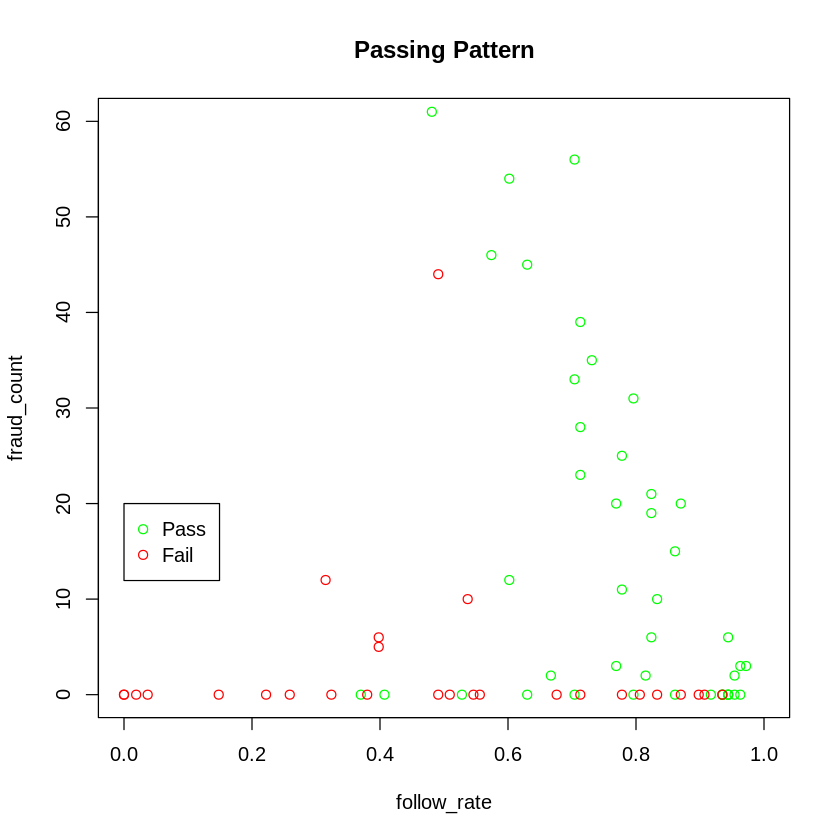

In [2]:
plot(history[history$final_grade>=50, ]$follow_rate,
      history[history$final_grade>=50, ]$fraud_count,
      col = 'green', xlim = c(0, 1), ylim = c(0, 60),
      xlab = "follow_rate", ylab = "fraud_count", main = "Passing Pattern")
points(history[history$final_grade<50, ]$follow_rate,
      history[history$final_grade<50, ]$fraud_count,
      col = 'red')
legend(0, 20, legend=c("Pass", "Fail"),
       col=c("green", "red"), pch=c(1,1))

<div dir='rtl'>
مشاهده می‌شود که بر خلاف پیشفرض انتظارات، اکثر کسانی که مرتکب تقلب شده‌اند دارای نمرات بالاتر و شانس بیشتری برای قبولی بوده‌اند. این رفتار می‌تواند به این دلیل باشد که کسانی مرتکب تقلب می‌شوند که بیشتر به دانشگاه و نمرات حساسیت نشان می‌دهند. مطابق با بخش دوم، تابع زیر را برای تبدیل دادگان خود به حالت باینری تهیه می‌کنیم:
</div>

In [3]:
history_to_binary = function(history, fraud_threshold) {
    binary_history = data.frame(
      history$follow_rate >= 0.56,
      history$final_grade >= 50,
      history$fraud_count >= fraud_threshold
    )
    colnames(binary_history) <- c("followed","passed","fraud")
    return (binary_history)
}

head(history_to_binary(history, 20))

,followed,passed,fraud
,<lgl>,<lgl>,<lgl>
1,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE
3,TRUE,FALSE,FALSE
4,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE


<div dir='rtl'>
حال نیاز است منطق مدل بیزی خود را به نحوی توسعه دهیم که با بیش از یک متغیر پیشگو نیز کار کند. ما از نحوه ارتباط دو متغیر پیشگو خود اطلاعی نداریم. برای ساده سازی فرض می‌کنیم این دو متغیر، به شرط متغیر پاسخ مستقل باشند. به مدل بیزی که از این فرض ساده‌سازی کمک بگیرد، مدل بیزی ساده‌لوح یا Naive Bayes Model گفته می‌شود.
اگر فرض کنیم دو متغیر پیشگوی ما به شرط متغیر پاسخ مستقل‌اند، با نام‌گذاری $X_1$ به عنوان متغیر پیشگو اول، $X_2$ به عنوان متغیر پیشگو دوم و $Y$ به عنوان متغیر پاسخ، به سادگی می‌توان نوشت:
$$
X = (X_1, X_2)\\
Bayes' Theorm: P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)} \\
= \frac{P(X1|Y)P(X2|Y)P(Y)}{P(X)}
$$
که همانطور که قبلا بیان شد، در مدل‌های بیزی مقایسه اهمیت دارد و می‌توان از مخرج کسر بالا صرف‌نظر کرد، پس متغیر موردنظر ما برای پیشگویی عبارت است از:
$$
P(X1|Y)P(X2|Y)P(Y)
$$
با منطقی مشابه، در مدل‌های بیزی ساده‌لوح، می‌توان معادله مذکور را برای هر تعداد متغیر پیشگو با فرض استقلال شرطی مذکور تعمیم داد.
</div>

In [4]:
bayes_prediction = function(situation1, situation2, observations, x1, x2, y) {
  P_y = sum(observations[y]) / nrow(observations)
  P_x1_if_y = sum(observations[observations[y]==1,][x1]) /
              sum(observations[y])
  P_x2_if_y = sum(observations[observations[y]==1,][x2]) /
              sum(observations[y])
  P_x1_if_not_y = sum(observations[observations[y] == 0,][x1]) / 
                  nrow(observations[observations[y] == 0,])
  P_x2_if_not_y = sum(observations[observations[y] == 0,][x1]) / 
                  nrow(observations[observations[y] == 0,])
  if (situation1 == 1 && situation2 == 1) {
    P_true = P_x1_if_y * P_x2_if_y * P_y
    P_false = P_x1_if_not_y * P_x2_if_not_y * (1-P_y)
    return (P_true > P_false)
  } else if (situation1 == 1 && situation2 == 0) {
    P_true = P_x1_if_y * (1-P_x2_if_y) * P_y
    P_false = P_x1_if_not_y * (1-P_x2_if_not_y) * (1-P_y)
    return (P_true > P_false)
  } else if (situation1 == 0 && situation2 == 1) {
    P_true = P_x2_if_y * (1-P_x1_if_y) * P_y
    P_false = P_x2_if_not_y * (1-P_x1_if_not_y) * (1-P_y)
    return (P_true > P_false)
  } else {
    P_true = (1-P_x1_if_y) * (1-P_x2_if_y) * P_y
    P_false = (1-P_x1_if_not_y) * (1-P_x2_if_not_y) * (1-P_y)
    return (P_true > P_false)
  }
}

In [5]:
cat("If someone has more than 56% contribution",
    "and makes frauds more than 50 times,",
    "they probably will pass:",
    bayes_prediction(
      1, 1, history_to_binary(history, 50),
      x1 = "followed", x2 = "fraud", y = "passed"
    )
)

cat("\nIf someone has more than 56% contribution",
    "and makes frauds less than 50 times,",
    "they probably will pass:",
    bayes_prediction(
      1, 0, history_to_binary(history, 50),
      x1 = "followed", x2 = "fraud", y = "passed"
    )
)

If someone has more than 56% contribution and makes frauds more than 50 times, they probably will pass: FALSE
If someone has more than 56% contribution and makes frauds less than 50 times, they probably will pass: TRUE

<div dir='rtl'>
در بخش دوم، تابع محاسبه بازدهی را با استفاده از حلقه تکرار پیاده‌سازی کردیم درحالی که در بخش اول گفته شد استفاده از حلقه تکرار بسیار غیر بهینه است. بنابراین در این بخش سعی خواهیم کرد به کمک توابعی که در بخش سوم با آن‌ها آشنا شدیم، تابع مذکور را به صورتی بهینه‌تر بازنویسی کنیم.
</div>

In [6]:
accuracy = function(binary_history) {
    bayes_prediction_over_the_binary_history = function(situation1, situation2){
        return (
            bayes_prediction(
                situation1,
                situation2,
                observations = binary_history,
                x1 = "followed",
                x2 = "fraud",
                y = "passed"
            )
        )
    }
    predictions = mapply(
        bayes_prediction_over_the_binary_history,
        binary_history$followed,
        binary_history$fraud
    )
    matchs_no = sum(predictions == binary_history$passed)
    return (matchs_no/nrow(binary_history))
}

cat("accuracy of threshold = 50 is", accuracy(history_to_binary(history, 50)))

accuracy of threshold = 50 is 0.7887324

In [7]:
accuracy_of_the_model_using_fraud_threshold = function(threshold) {
    return (accuracy(history_to_binary(history, threshold)))
}
accuracies = mapply(accuracy_of_the_model_using_fraud_threshold, seq(0:60)-1)
# `mapply()` is a function to run another function over serries of inputs.

In [8]:
best_accuracy = max(accuracies)
best_threshold <- which.max(accuracies)-1
# -`which.max()` is a function to find index of the maximum value in input.

cat(
  "The best accuracy is", best_accuracy,
  "corresponding to the fraud threshold", best_threshold
)

The best accuracy is 0.8169014 corresponding to the fraud threshold 0

<div dir='rtl'>
بنابراین مشاهده می‌کنیم که به ازای هیچ مرزی، تعداد تقلب‌ها نتوانست ما را در پیشگویی قبولی یا ردی دانشجویان یاری کند. اما این نتیجه قابل اطمینان نیست چراکه تمام آزمایش‌های ما به شرط قبول مرز 0.56 برای میزان مشارکت بود که این مقدار بدون درنظر گرفتن مقوله تقلب پیدا شده بود. بنابراین ممکن از با درنظر گرفتن تغییرات همزمان هر دوی این متغیر‌های پیشگو، به نتایج بهتری دست یابیم. این امر را بررسی می‌کنیم.
</div>

In [9]:
history_to_binary = function(history, follow_threshold, fraud_threshold) {
    binary_history = data.frame(
      history$follow_rate >= follow_threshold,
      history$final_grade >= 50,
      history$fraud_count >= fraud_threshold
    )
    colnames(binary_history) <- c("followed","passed","fraud")
    return (binary_history)
}

In [10]:
accuracy_of_the_model_using_thresholds = function(
    follow_threshold,
    fraud_threshold
) {
    return (accuracy(history_to_binary(history, follow_threshold,
    fraud_threshold)))
}

accuracy_of_the_model_using_threshold_ranges = function(
    follow_threshold,
    fraud_threshold
) {
    return (mapply(
        accuracy_of_the_model_using_thresholds,
        follow_threshold,
        fraud_threshold
    ))
}

accuracies = outer(
    (seq(0:100)-1)/100,
    seq(0:60)-1,
    accuracy_of_the_model_using_threshold_ranges
)
# `outer()` is a function to run another function over serries of inputs.
# Try to find out the difference between `outer` and `mapply`.

# This cells might take several minutes.

In [11]:
argmax = which(accuracies == max(accuracies), arr.ind=TRUE)[1,]
# `which` returns indexes of True values in a matrix
cat("\nThe best accuracy has been achived in thresholds", (argmax[1]-1)/100,
    "for the follow rate and", (argmax[2]-1), "for the fraud count.",
    "\nThe best accuracy is", accuracies[argmax[1],argmax[2]])


The best accuracy has been achived in thresholds 0.56 for the follow rate and 0 for the fraud count. 
The best accuracy is 0.8169014

<div dir='rtl'>
باز هم به نتیجه یکسانی رسیدیم. این نتیجه با توجه به نمودار رسم شده در اول این بخش، مورد انتظار است. با اینحال سعی کنید مسیر طی شده را به دقت بررسی کنید. این مسیر دارای جزئیات زیادی است.
</div>

<div dir='rtl'>
<h3>naiveBayes in R</h3>
مدل بیز ساده‌لوح، کاربرد زیادی دارد. درنتیجه در کتابخانه زیر آماده شده است که از این پس از آن استفاده خواهیم کرد. نحوه استفاده از این کتاب‌خانه را با حل دوباره مسئله بالا نشان خواهیم داد:
</div>

In [12]:
# You can install new packages like this:
install.packages("e1071")
# You can import new libraries lile this:
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [13]:
# It's how you can build a "naiveBayes" model.
# `passed	 ~ followed + fraud` means that the model should
# predict "rainy" column using "cloudy" and "temperature19" predictors.
# `data = history` means that model should use "history" dataframe as it's base
# dataframe.
model <- naiveBayes(passed ~ followed + fraud,
                    data = history_to_binary(history, 0.56, 50))
# using model's name, you can see model detail
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    FALSE      TRUE 
0.3802817 0.6197183 

Conditional probabilities:
       followed
Y            FALSE       TRUE
  FALSE 0.66666667 0.33333333
  TRUE  0.09090909 0.90909091

       fraud
Y            FALSE       TRUE
  FALSE 1.00000000 0.00000000
  TRUE  0.93181818 0.06818182


In [14]:
test = data.frame("followed" = c(T, T, F, F), "fraud" = c(T, F, T, F))
# Just like bellow, you can make your prediction using your model.
# Ignore `type = "raw"` option for now. We will discuss about other types later.
prediction = predict(model, test, type = "raw")
# Output of this function will be corresponding probabilities for each class.
# Each row of the output is corresponding result for each row of prediction
# input (here, `test` dataframe).
prediction

FALSE,TRUE
0.003289146,0.9967109
0.194499018,0.8055010
0.061913696,0.9380863
0.828451883,0.1715481


In [15]:
# Like bellow, we can compute predicted class for each row.
# By answering this question, we can find the logic of this prediction:
# In each row, which column has the greatest probability?
predicted_classes = colnames(prediction)[apply(prediction, 1, which.max)]
# -`apply()` is a function to run another function on each column or row of a
#   datafram. Second input of this function determines that the input function
#   should be applied on each row or column.
# -`apply(prediction,1,which.max)` means: find index of the column with maximum
#   value, for each row of "prediction" dataframe.
# -`colnames()` returns column names of the input dataframe.
# -`colnames(prediction)[indexes]` means: translates `indexes` to corresponding
#   column names.
predicted_classes

[1] "TRUE"  "TRUE"  "TRUE"  "FALSE"

<div dir='rtl'>
همانطور که مشاهده کردید، نتایج حاصل با نتایجی که تابع ما فراهم کرده بود یکسان است. حال که نحوه ساخت مدل‌های بیزی ساده لوح در R را یادگرفتیم،
بد نیست حالت‌های مختلفی از مسئله را تعریف کنیم و آن‌ها را با استفاده از این روش حل کنیم.

*   مسئله‌ای با تعداد بیشتری متغیر پیشگو؛
*   مسئله‌ای با تعداد بیشتری طبقه؛
*   مسئله‌ای مشابه آن‌چه حل شد، با این تفاوت که بجای آن که میزان مشارکت در درس را به دو دسته کوچکتر از ۱۹ و غیر آن تقسیم کنیم، آن را به تعداد سه یا بیشتر حالت تقسیم کنیم؛ به عنوان مثال مشارکت کمتر از ۱۷ درصد، بیشتر از 60 درصد و مابین این دو. برای حل این مسئله کافیست متغیر پیشگو گسسته جدیدی که بجای دما استفاده می‌کنیم، بجای دو مقدار صفر و یک، یک مقدار سوم (مانند ۲) نیز اخذ کند. تابع ما این حالت متغیر را نمی‌پذیرفت اما کتابخانه‌ی معرفی شده این مسئله را نیز حل می‌کند. خوب است اگر سعی کنید معادله‌ی مورد استفاده در مدلی که این مسئله را حل می‌کند را توسعه دهید. منطق مورد استفاده مانند آنچه است که تا الان دیدید.
</div>

<div dir='rtl'>
<font color='green'>
<h3><font color='green'>اگر مشتاق مشاهده بیشتر هستید، ادامه دهید:</font></h3>
قصد داریم نحوه طبقه‌بندی مدل‌های بیزی را به صورت بصری مشاهده کنیم.
کد‌های این قصمت توضیح داده نخواهند شد.
</font>
</div>

In [16]:
df = data.frame(row.names = seq(1, 100 * 100))
df['x1'] = rep(seq(100), 100)
df['x2'] = rep(seq(100), each = 100)
# `each=3` means repeat each element 3 times
df['y'] = (df['x2'] / 100) > ((df['x1'] / 100) + 0.1) ^ 3

In [17]:
train_size = floor(0.75 * nrow(df))
set.seed(100)
train_ind = sample(seq_len(nrow(df)), size = train_size)
train = df[train_ind, ]
test = df[-train_ind, ]

In [18]:
model <- naiveBayes(y ~ x1 + x2, data = train)

In [19]:
prediction = predict(model, test, type = "raw")
prediction = as.data.frame(prediction)
prediction["predicted_class"] = prediction["TRUE"] > prediction["FALSE"]
head(prediction)

,FALSE,TRUE,predicted_class
,<dbl>,<dbl>,"<lgl[,1]>"
1,0.0008823338,0.9991177,TRUE
2,0.0021315200,0.9978685,TRUE
3,0.0035618805,0.9964381,TRUE
4,0.0042154203,0.9957846,TRUE
5,0.0069298106,0.9930702,TRUE
6,0.0081554733,0.9918445,TRUE


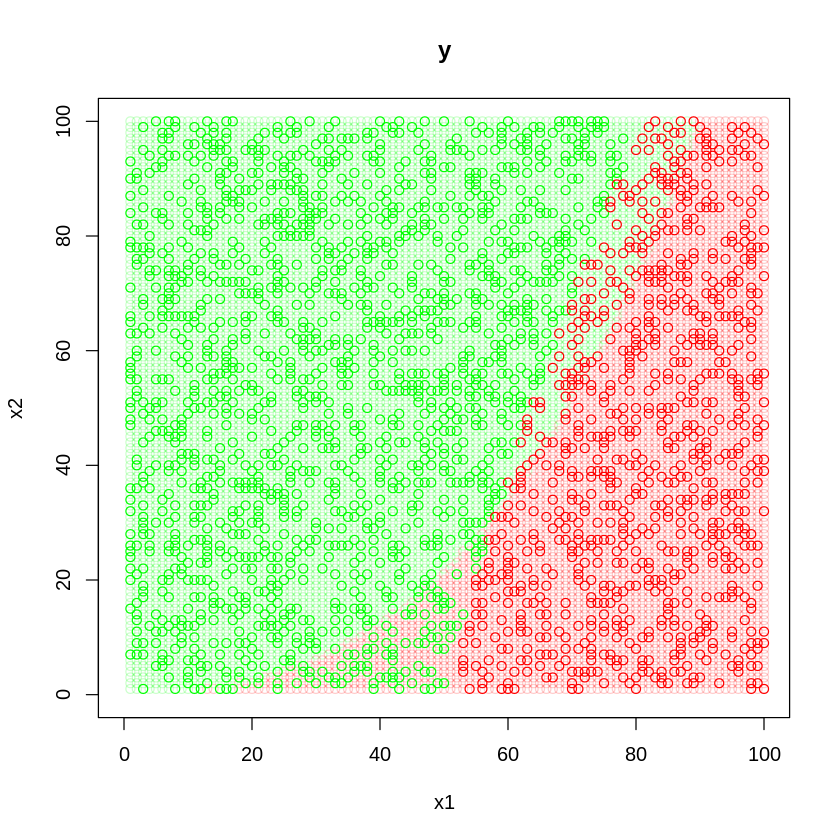

In [20]:
plot(train[train$y, ]$x1, train[train$y, ]$x2,
      col = scales::alpha('green', 0.2), xlim = c(0, 100), ylim = c(0, 100),
      xlab = "x1", ylab = "x2", main = "y")
points(train[!train$y, ]$x1, train[!train$y, ]$x2,
      col = scales::alpha('red', 0.2))
points(test[prediction$predicted_class, ]$x1,
      test[prediction$predicted_class, ]$x2, col = 'green')
points(test[!prediction$predicted_class, ]$x1,
      test[!prediction$predicted_class, ]$x2, col = 'red')

<div dir='rtl'>
<font color='green'>
رنگ‌های پس‌زمینه نشان دهنده کلاس حقیقی و رنگ‌های دایره‌ای نشان دهنده پیش‌بینی ما است.
</font>
</div>